In [1]:
from modelo_tweets import *
import itertools

In /u01/user8/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /u01/user8/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /u01/user8/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /u01/user8/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /u01/user8/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-d

In [2]:
partidos=pd.read_csv('entradas/Partidos.csv')
manifestaciones=pd.read_csv('entradas/Manifestaciones.csv')
f_especiales=pd.read_csv('entradas/FechasEspeciales.csv')

partidos_M=pd.to_datetime(partidos['Fecha'].dropna())
partidos_S=pd.to_datetime(partidos['Fecha.1'].dropna())
manifestaciones=pd.to_datetime(manifestaciones['Fecha'].dropna())
f_especiales=pd.to_datetime(f_especiales[['2019','2020']].values.flatten())
f_especiales=f_especiales[~f_especiales.isna()]

def TC(t):
    return np.array([
                     t.weekday()/6.0,
                     (t.hour > 12)*1,
                     (pd.Timestamp(t.date()) == partidos_M).sum(),
                     (pd.Timestamp(t.date()) == partidos_S).sum(),
                     (pd.Timestamp(t.date()) == manifestaciones).sum(),
                     (pd.Timestamp(t.date()) == f_especiales).sum(),                
                     1
                    ])

In [3]:
with open('entradas/data_tweets.pickle', 'rb') as handle:
    data = pickle.load(handle)

In [4]:
# time series split
splits=[
        [('2019-04-01 00:00','2019-05-01 00:00'),
         ('2019-05-01 00:00','2019-05-15 00:00')],
        [('2019-04-01 00:00','2019-05-15 00:00'),
         ('2019-05-15 00:00','2019-06-01 00:00')],
        [('2019-04-01 00:00','2019-06-01 00:00'),
         ('2019-06-01 00:00','2019-06-15 00:00')],    
        [('2019-04-01 00:00','2019-06-15 00:00'),
         ('2019-06-15 00:00','2019-07-01 00:00')],    
        [('2019-04-01 00:00','2019-07-01 00:00'),
         ('2019-07-01 00:00','2019-07-15 00:00')],   
        [('2019-04-01 00:00','2019-07-15 00:00'),
         ('2019-07-15 00:00','2019-08-01 00:00')],     
        [('2019-04-01 00:00','2019-08-01 00:00'),
         ('2019-08-01 00:00','2019-08-15 00:00')],    
        [('2019-04-01 00:00','2019-08-15 00:00'),
         ('2019-08-15 00:00','2019-09-01 00:00')],   
        [('2019-04-01 00:00','2019-09-01 00:00'),
         ('2019-09-01 00:00','2019-09-15 00:00')],  
        [('2019-04-01 00:00','2019-09-15 00:00'),
         ('2019-10-15 00:00','2019-10-01 00:00')],    
        [('2019-04-01 00:00','2019-10-01 00:00'),
         ('2019-10-01 00:00','2019-10-15 00:00')],   
        [('2019-04-01 00:00','2019-10-15 00:00'),
         ('2019-10-15 00:00','2019-11-01 00:00')],    
        [('2019-04-01 00:00','2019-11-01 00:00'),
         ('2019-11-01 00:00','2019-11-15 00:00')],    
        [('2019-04-01 00:00','2019-11-15 00:00'),
         ('2019-11-15 00:00','2019-12-01 00:00')], 
        [('2019-04-01 00:00','2019-12-01 00:00'),
         ('2019-12-01 00:00','2019-12-15 00:00')],     
        [('2019-04-01 00:00','2019-12-15 00:00'),
         ('2019-12-15 00:00','2020-01-01 00:00')],     
        ]

# blocking time series split
splits=[
        [('2019-04-01 00:00','2019-05-01 00:00'),
         ('2019-05-01 00:00','2019-05-15 00:00')],
        [('2019-04-15 00:00','2019-05-15 00:00'),
         ('2019-05-15 00:00','2019-06-01 00:00')],
        [('2019-05-01 00:00','2019-06-01 00:00'),
         ('2019-06-01 00:00','2019-06-15 00:00')],    
        [('2019-05-15 00:00','2019-06-15 00:00'),
         ('2019-06-15 00:00','2019-07-01 00:00')],    
        [('2019-06-01 00:00','2019-07-01 00:00'),
         ('2019-07-01 00:00','2019-07-15 00:00')],   
        [('2019-06-15 00:00','2019-07-15 00:00'),
         ('2019-07-15 00:00','2019-08-01 00:00')],     
        [('2019-07-01 00:00','2019-08-01 00:00'),
         ('2019-08-01 00:00','2019-08-15 00:00')],    
        [('2019-07-15 00:00','2019-08-15 00:00'),
         ('2019-08-15 00:00','2019-09-01 00:00')],   
        [('2019-08-01 00:00','2019-09-01 00:00'),
         ('2019-09-01 00:00','2019-09-15 00:00')],  
        [('2019-08-15 00:00','2019-09-15 00:00'),
         ('2019-10-15 00:00','2019-10-01 00:00')],    
        [('2019-09-01 00:00','2019-10-01 00:00'),
         ('2019-10-01 00:00','2019-10-15 00:00')],   
        [('2019-09-15 00:00','2019-10-15 00:00'),
         ('2019-10-15 00:00','2019-11-01 00:00')],    
        [('2019-10-01 00:00','2019-11-01 00:00'),
         ('2019-11-01 00:00','2019-11-15 00:00')],    
        [('2019-10-15 00:00','2019-11-15 00:00'),
         ('2019-11-15 00:00','2019-12-01 00:00')], 
        [('2019-11-01 00:00','2019-12-01 00:00'),
         ('2019-12-01 00:00','2019-12-15 00:00')],     
        [('2019-11-15 00:00','2019-12-15 00:00'),
         ('2019-12-15 00:00','2020-01-01 00:00')],     
        ]

In [ ]:
results_by_split={}
for split in splits:
    train_period,validate_period=split
    print(train_period,validate_period)
    results={}
    results_cum={}
    for j in range(1,7):
        for i in list(itertools.combinations(np.arange(6),j)):
            print(i,np.array(i+(6,)))
            func = lambda x: TC(x)[np.array(i+(6,))]

            model=modelTweets(data,
                      train_period,
                      validate_period,
                      f_covariates=(func,restore_date),
                      followers_rate=4,
                      win_size_pred_period=1
                     )
            model.train()
            model.compute_lambda_predict()
            model.compute_errors()
            results[i]=model.errors_predict
            results_cum[i]=model.errors_predict_cum
    results_by_split[(train_period,validate_period)]=[results,results_cum]

In [2]:
with open('errors_covariados_blocking2.pickle', 'rb') as f:
    x = pickle.load(f)

In [39]:
values=[]
for idx,period in enumerate(x):
    for comb in x[period][0]:
        values.append([idx,comb,x[period][0][comb]['MAE']])
MAE=pd.DataFrame(values,columns=['Fold','Combination','MAE'])

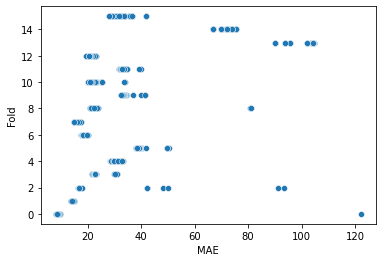

In [40]:
sns_plot=sns.scatterplot(data=MAE,y='Fold',x='MAE')
sns_plot.get_figure().savefig('results/figures/MAE_general_block.pdf')

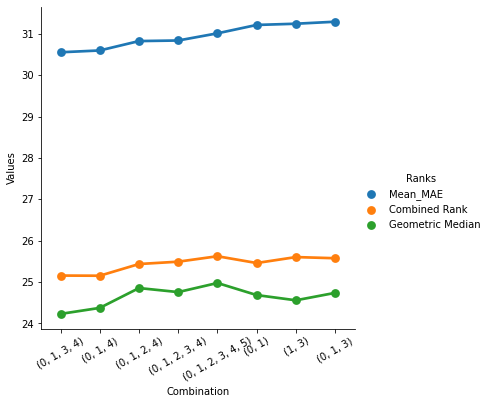

In [49]:
A=MAE.pivot('Combination','Fold','MAE')
index=A.index
A=A.values
y=np.zeros((len(A),1))
y1=(A/np.linalg.norm(A-y,axis=0)).sum(axis=1)/(1/np.linalg.norm(A-y,axis=0)).sum()
y1=y1.reshape((len(A),1))
while np.linalg.norm(y-y1)> 10**(-6):
    y=y1.copy()
    y1=(A/np.linalg.norm(A-y,axis=0)).sum(axis=1)/(1/np.linalg.norm(A-y,axis=0)).sum()
    y1=y1.reshape((len(A),1))
summ=pd.DataFrame({'Mean_MAE':A.mean(axis=1),
#                    'std_MAE':A.std(axis=1),
                   'Combined Rank':np.prod(A,axis=1)**(1/16),
                   'Geometric Median':y1.reshape(len(A))
                  }
                  ,index=index)
summ=summ.reset_index()
R=pd.concat([summ.sort_values('Mean_MAE').head(),
             summ.sort_values('Combined Rank').head(),
             summ.sort_values('Geometric Median').head()]).drop_duplicates()
R=R.melt('Combination',var_name='Ranks',value_name='Values')
g=sns.catplot(data=R,x='Combination',y='Values',hue='Ranks',kind="point")
g.set_xticklabels(rotation=30)
g.savefig('results/figures/ranks_block.pdf')

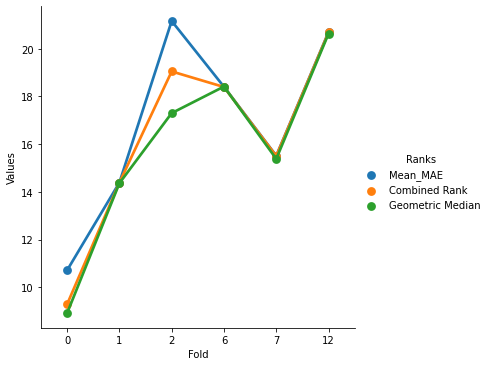

In [50]:
A=MAE.pivot('Fold','Combination','MAE')
# A=MAE[MAE.Combination.isin([(0,1,3,4),(0,1,4),(0,1,2,4)])].pivot('Fold','Combination','MAE')
index=A.index
A=A.values
y=np.zeros((len(A),1))
y1=(A/np.linalg.norm(A-y,axis=0)).sum(axis=1)/(1/np.linalg.norm(A-y,axis=0)).sum()
y1=y1.reshape((len(A),1))
while np.linalg.norm(y-y1)> 10**(-6):
    y=y1.copy()
    y1=(A/np.linalg.norm(A-y,axis=0)).sum(axis=1)/(1/np.linalg.norm(A-y,axis=0)).sum()
    y1=y1.reshape((len(A),1))
summ=pd.DataFrame({'Mean_MAE':A.mean(axis=1),
                   'Combined Rank':np.prod(A,axis=1)**(1/A.shape[1]),
                   'Geometric Median':y1.reshape(len(A))
                  }
                  ,index=index)
summ=summ.reset_index()
R=pd.concat([summ.sort_values('Mean_MAE').head(),
             summ.sort_values('Combined Rank').head(),
             summ.sort_values('Geometric Median').head()]).drop_duplicates()
R=R.melt('Fold',var_name='Ranks',value_name='Values')
g=sns.catplot(data=R,x='Fold',y='Values',hue='Ranks',kind="point")
g.savefig('results/figures/times_ranks_block.pdf')

<AxesSubplot:xlabel="('MAE', 'mean')", ylabel="('Combination', '')">

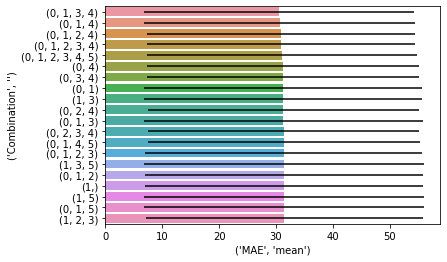

In [32]:
values=[]
for idx,period in enumerate(x):
    for comb in x[period][0]:
        values.append([idx,comb,x[period][0][comb]['MAE']])
MAE=pd.DataFrame(values,columns=['Period','Combination','MAE'])
MAE=MAE.groupby('Combination').agg({'MAE':['mean','std']}).reset_index()
MAE=MAE.sort_values(('MAE','mean'))
sns.barplot(data=MAE.head(20),y=('Combination',''),x=('MAE','mean'),xerr=MAE[('MAE','std')].head(20).values)

In [116]:
values=[]
for idx,period in enumerate(x):
    for comb in x[period][0]:
        values.append([idx,comb,x[period][0][comb]['RMSE']])
MAE=pd.DataFrame(values,columns=['Period','Combination','RMSE'])

<AxesSubplot:xlabel='RMSE', ylabel='Period'>

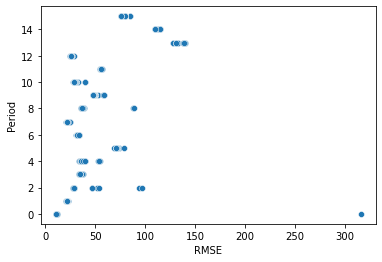

In [119]:
sns.scatterplot(data=MAE,y='Period',x='RMSE')

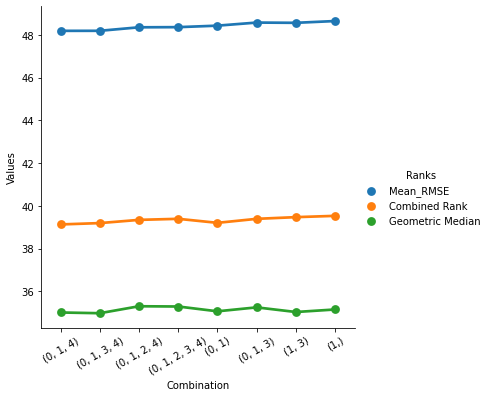

In [121]:
A=MAE.pivot('Combination','Period','RMSE')
index=A.index
A=A.values
y=np.zeros((len(A),1))
y1=(A/np.linalg.norm(A-y,axis=0)).sum(axis=1)/(1/np.linalg.norm(A-y,axis=0)).sum()
y1=y1.reshape((len(A),1))
while np.linalg.norm(y-y1)> 10**(-6):
    y=y1.copy()
    y1=(A/np.linalg.norm(A-y,axis=0)).sum(axis=1)/(1/np.linalg.norm(A-y,axis=0)).sum()
    y1=y1.reshape((len(A),1))
summ=pd.DataFrame({'Mean_RMSE':A.mean(axis=1),
                   'Combined Rank':np.prod(A,axis=1)**(1/16),
                   'Geometric Median':y1.reshape(len(A))
                  }
                  ,index=index)
summ=summ.reset_index()
R=pd.concat([summ.sort_values('Mean_RMSE').head(),
             summ.sort_values('Combined Rank').head(),
             summ.sort_values('Geometric Median').head()]).drop_duplicates()
R=R.melt('Combination',var_name='Ranks',value_name='Values')
g=sns.catplot(data=R,x='Combination',y='Values',hue='Ranks',kind="point")
g.set_xticklabels(rotation=30)

<AxesSubplot:xlabel="('RMSE', 'mean')", ylabel="('Combination', '')">

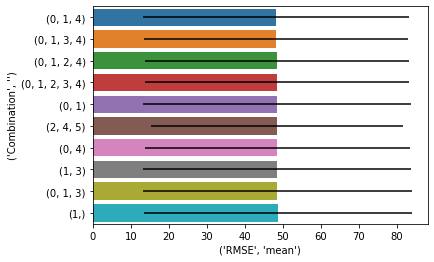

In [122]:
values=[]
for idx,period in enumerate(x):
    for comb in x[period][0]:
        values.append([idx,comb,x[period][0][comb]['RMSE']])
MAE=pd.DataFrame(values,columns=['Period','Combination','RMSE'])
MAE=MAE.groupby('Combination').agg({'RMSE':['mean','std']}).reset_index()
MAE=MAE.sort_values(('RMSE','mean'))
sns.barplot(data=MAE.head(10),y=('Combination',''),x=('RMSE','mean'),xerr=MAE[('RMSE','std')].head(10).values)

In [34]:
values=[]
for idx,period in enumerate(x):
    for comb in x[period][0]:
        values.append([idx,comb,x[period][0][comb]['Pearson']])
MAE=pd.DataFrame(values,columns=['Period','Combination','Pearson'])

<AxesSubplot:xlabel='Pearson', ylabel='Period'>

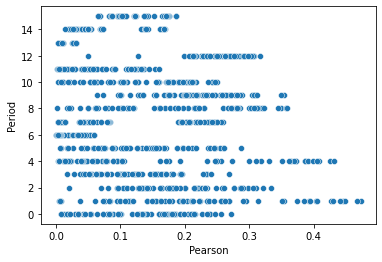

In [35]:
sns.scatterplot(data=MAE,y='Period',x='Pearson')

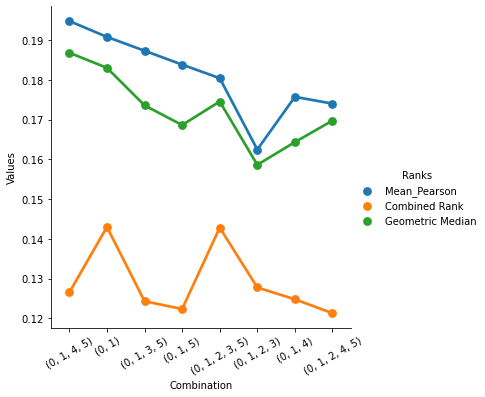

In [36]:
A=MAE.pivot('Combination','Period','Pearson')
index=A.index
A=A.values
y=np.zeros((len(A),1))
y1=(A/np.linalg.norm(A-y,axis=0)).sum(axis=1)/(1/np.linalg.norm(A-y,axis=0)).sum()
y1=y1.reshape((len(A),1))
while np.linalg.norm(y-y1)> 10**(-6):
    y=y1.copy()
    y1=(A/np.linalg.norm(A-y,axis=0)).sum(axis=1)/(1/np.linalg.norm(A-y,axis=0)).sum()
    y1=y1.reshape((len(A),1))
summ=pd.DataFrame({'Mean_Pearson':A.mean(axis=1),
                   'Combined Rank':np.prod(A,axis=1)**(1/16),
                   'Geometric Median':y1.reshape(len(A))
                  }
                  ,index=index)
summ=summ.reset_index()
R=pd.concat([summ.sort_values('Mean_Pearson',ascending=False).head(),
             summ.sort_values('Combined Rank',ascending=False).head(),
             summ.sort_values('Geometric Median',ascending=False).head()]).drop_duplicates()
R=R.melt('Combination',var_name='Ranks',value_name='Values')
g=sns.catplot(data=R,x='Combination',y='Values',hue='Ranks',kind="point")
g.set_xticklabels(rotation=30)
g.savefig('results/figures/pearson_block.pdf')

<AxesSubplot:xlabel="('Pearson', 'mean')", ylabel="('Combination', '')">

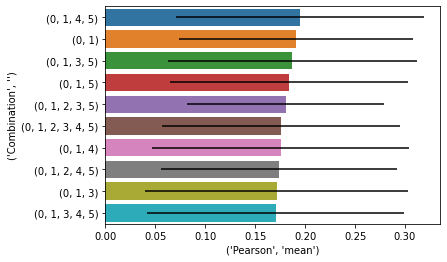

In [123]:
values=[]
for idx,period in enumerate(x):
    for comb in x[period][0]:
        values.append([idx,comb,x[period][0][comb]['Pearson']])
MAE=pd.DataFrame(values,columns=['Period','Combination','Pearson'])
MAE=MAE.groupby('Combination').agg({'Pearson':['mean','std']}).reset_index()
MAE=MAE.sort_values(('Pearson','mean'),ascending=False)
sns.barplot(data=MAE.head(10),y=('Combination',''),x=('Pearson','mean'),xerr=MAE[('Pearson','std')].head(10).values)

<AxesSubplot:xlabel="('MAPE', 'mean')", ylabel="('Combination', '')">

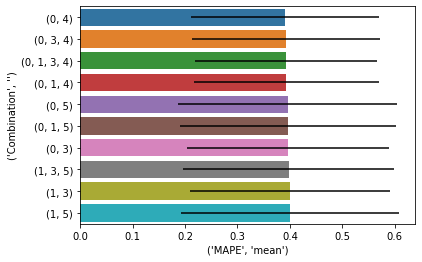

In [37]:
values=[]
for idx,period in enumerate(x):
    for comb in x[period][1]:
        values.append([idx,comb,x[period][1][comb]['MAPE']])
MAE=pd.DataFrame(values,columns=['Period','Combination','MAPE'])
MAE=MAE.groupby('Combination').agg({'MAPE':['mean','std']}).reset_index()
MAE=MAE.sort_values(('MAPE','mean'))
sns.barplot(data=MAE.head(10),y=('Combination',''),x=('MAPE','mean'),xerr=MAE[('MAPE','std')].head(10).values)

In [38]:
MAE

Combination      MAPE          
                      mean       std
29        (0, 4)  0.390886  0.179819
26     (0, 3, 4)  0.392403  0.179154
11  (0, 1, 3, 4)  0.392435  0.174323
14     (0, 1, 4)  0.393314  0.176168
31        (0, 5)  0.395661  0.208913
..           ...       ...       ...
39  (1, 2, 4, 5)  0.508733  0.390604
61        (4, 5)  0.618447  0.639491
62          (5,)  0.624288  0.653922
57        (3, 4)  0.646296  0.893182
56          (3,)  0.668634  0.873784

[63 rows x 3 columns]

<AxesSubplot:xlabel="('RMSE', 'mean')", ylabel="('Combination', '')">

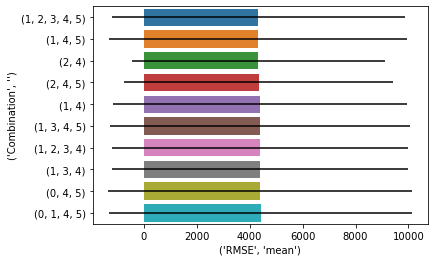

In [11]:
values=[]
for idx,period in enumerate(x):
    for comb in x[period][1]:
        values.append([idx,comb,x[period][1][comb]['RMSE']])
MAE=pd.DataFrame(values,columns=['Period','Combination','RMSE'])
MAE=MAE.groupby('Combination').agg({'RMSE':['mean','std']}).reset_index()
MAE=MAE.sort_values(('RMSE','mean'))
sns.barplot(data=MAE.head(10),y=('Combination',''),x=('RMSE','mean'),xerr=MAE[('RMSE','std')].head(10).values)

In [12]:
MAE

Combination          RMSE              
                             mean           std
36  (1, 2, 3, 4, 5)  4.327420e+03  5.533635e+03
46        (1, 4, 5)  4.329738e+03  5.631273e+03
53           (2, 4)  4.335707e+03  4.774865e+03
54        (2, 4, 5)  4.344662e+03  5.068882e+03
45           (1, 4)  4.381940e+03  5.549751e+03
..              ...           ...           ...
20  (0, 2, 3, 4, 5)  7.183478e+05  2.763609e+06
8   (0, 1, 2, 4, 5)  7.487785e+07  2.899827e+08
9      (0, 1, 2, 5)  7.487797e+07  2.899827e+08
23     (0, 2, 4, 5)  7.274028e+08  2.817201e+09
24        (0, 2, 5)  7.274029e+08  2.817201e+09

[63 rows x 3 columns]

In [11]:
MAE=pd.DataFrame({'Covariates':list(x.keys()),'MAE':[x[i]['MAE'] for i in x]}).sort_values('MAE')
# plt.figure(figsize=(10,12))
sns.barplot(data=MAE.head(10),x='MAE',y='Covariates')
plt.savefig('results/figures/MAE.pdf',bbox_inches = 'tight')

TypeError: list indices must be integers or slices, not str

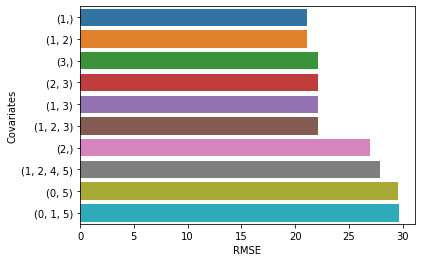

In [219]:
RMSE=pd.DataFrame({'Covariates':list(x.keys()),'RMSE':[x[i]['RMSE'] for i in x]}).sort_values('RMSE')
# plt.figure(figsize=(10,12))
sns.barplot(data=RMSE.head(10),x='RMSE',y='Covariates')
plt.savefig('results/figures/RMSE.pdf',bbox_inches = 'tight')

,Covariates,Pearson
52,"(1, 2, 3, 5)",0.320981
17,"(2, 5)",0.320981
5,"(5,)",0.320981
19,"(3, 5)",0.320981
38,"(2, 3, 5)",0.320981
...,...,...
42,"(0, 1, 2, 4)",0.013467
23,"(0, 1, 4)",0.011516
28,"(0, 3, 4)",0.010798
26,"(0, 2, 4)",0.009859


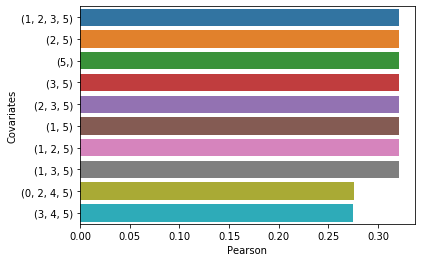

In [235]:
Pearson=pd.DataFrame({'Covariates':list(x.keys()),'Pearson':[abs(x[i]['Pearson'][0]) for i in x]}).sort_values('Pearson',ascending=False)
# plt.figure(figsize=(10,12))
sns.barplot(data=Pearson.head(10),x='Pearson',y='Covariates')
plt.savefig('results/figures/Pearson.pdf',bbox_inches = 'tight')
Pearson

In [199]:
with open('errors_cum_cov.pickle', 'rb') as f:
    y = pickle.load(f)

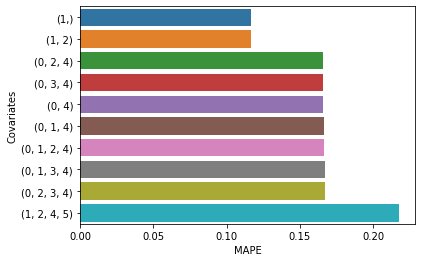

In [224]:
MAE=pd.DataFrame({'Covariates':list(y.keys()),'MAPE':[y[i]['MAPE'] for i in y]}).sort_values('MAPE')
# plt.figure(figsize=(10,12))
sns.barplot(data=MAE.head(10),x='MAPE',y='Covariates')
plt.savefig('results/figures/MAPE_cumm.pdf',bbox_inches = 'tight')

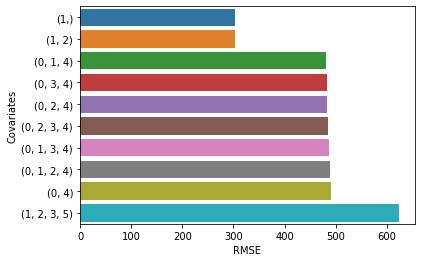

In [226]:
RMSE=pd.DataFrame({'Covariates':list(y.keys()),'RMSE':[y[i]['RMSE'] for i in y]}).sort_values('RMSE')
# plt.figure(figsize=(10,12))
sns.barplot(data=RMSE.head(10),x='RMSE',y='Covariates')
plt.savefig('results/figures/RMSE_cumm.pdf',bbox_inches = 'tight')

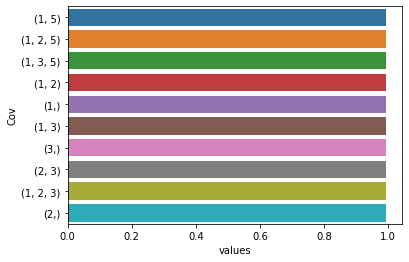

In [209]:
Pearson=pd.DataFrame({'Cov':list(y.keys()),'values':[abs(y[i]['Pearson'][0]) for i in y]}).sort_values('values')
# plt.figure(figsize=(10,12))
sns.barplot(data=Pearson.tail(10),x='values',y='Cov')